#### import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

#### read data (movies, users, ratings)
#### merge data as a dataframe

In [2]:
movie_data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\movies.dat", sep="::", header=None,
 names=['MovieID','Title','Genres'],
 dtype={'MovieID': np.int32, 'Title': np.str, 'Genres':np.str}, engine='python')
users_data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\users.dat", sep="::", header=None,
 names=['UserID','Gender','Age','Occupation','Zip-code'],
 dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32,
 'Occupation' :np.int32, 'Zip-code' : np.str}, engine='python')
ratings_data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\ratings.dat", sep="::", header=None,
 names=['UserID','MovieID','Rating','Timestamp'],
 dtype={'UserID': np.int32, 'MovieID': np.int32,
 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')

df = pd.merge(movie_data,ratings_data)
df = pd.merge(df,ratings_data)
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


#### remove unnecessary data

In [3]:
df = df.drop(['Title'], axis = 1)
df = df.drop(['Genres'], axis = 1)
df = df.drop(['Timestamp'], axis = 1)
df.head()

,MovieID,UserID,Rating
0,1,1,5
1,1,6,4
2,1,8,4
3,1,9,5
4,1,10,5


#### remove null data (here there is no null or NaN value)

In [4]:
movie_data.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

#### group data by age

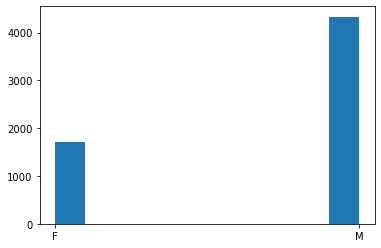

In [5]:
age_group=users_data.groupby('Age').size()
plt.hist(users_data.Gender)
plt.show()

#### group data by user id

In [6]:
user_group=ratings_data.groupby(['UserID']).size()
user_group.head(10)

UserID
1      53
2     129
3      51
4      21
5     198
6      71
7      31
8     139
9     106
10    401
dtype: int64

#### finde out the correlation between features

In [7]:
corr = df.corr()
corr.shape

(3, 3)

<AxesSubplot:>

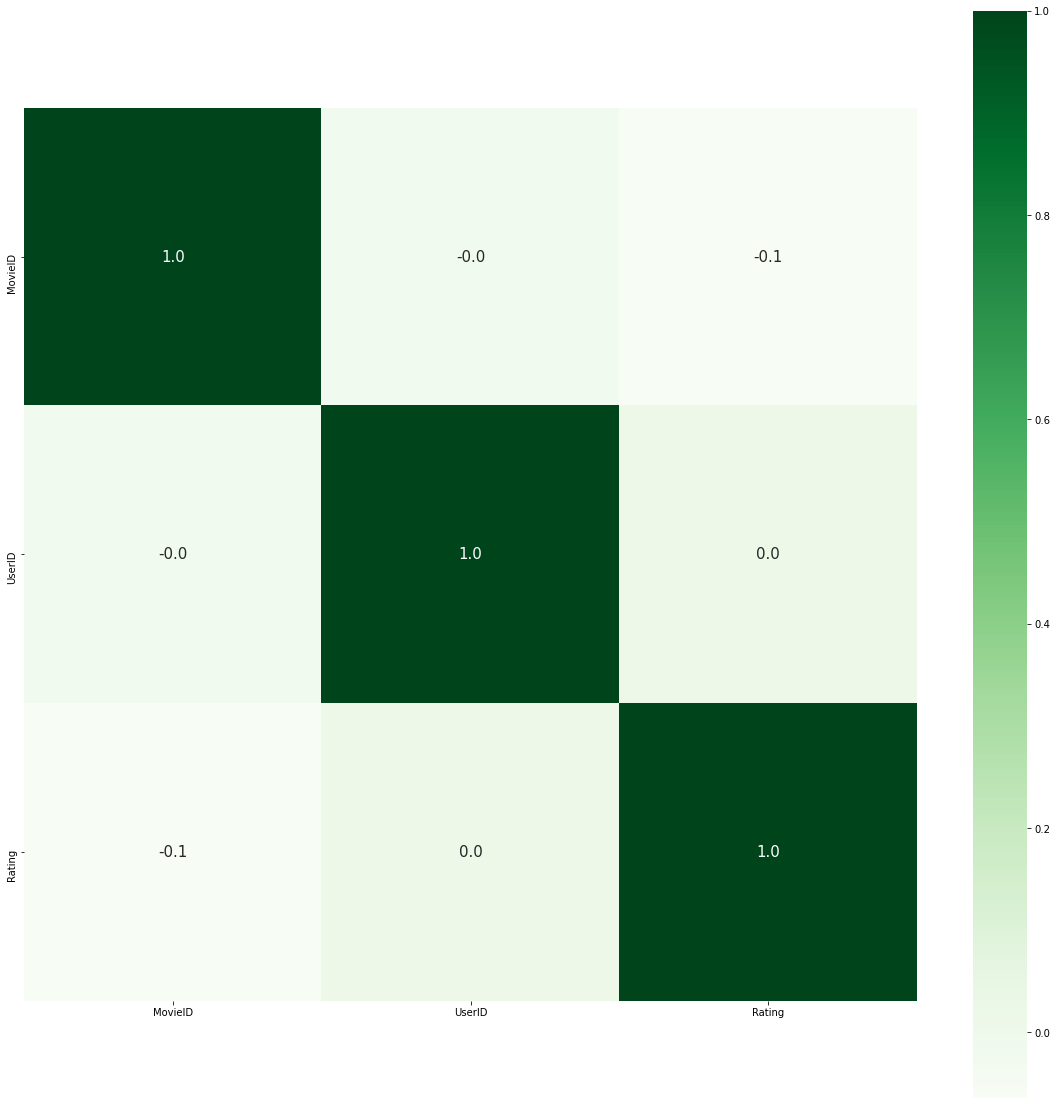

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [9]:
X = df.drop(['Rating'], axis = 1)
y = df['Rating']

#### splitting to train and test data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

#### Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
y_pred = reg.predict(X_train)

In [23]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8541451391746451
Adjusted R^2: 0.8541447225315855
MAE: 0.333170638695358
MSE: 0.18197597401113477
RMSE: 0.4265864203313729


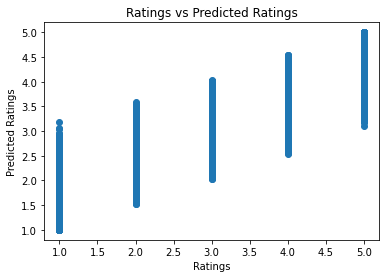

In [24]:
plt.scatter(y_train, y_pred)
plt.xlabel("Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Ratings vs Predicted Ratings")
plt.show()

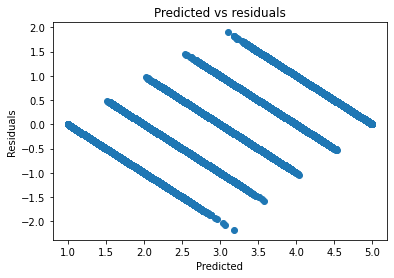

In [25]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [26]:
y_test_pred = reg.predict(X_test)

In [27]:
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.04896132165664158
Adjusted R^2: -0.04896831333378393
MAE: 0.9024870110610106
MSE: 1.3096571586633474
RMSE: 1.144402533492192
